# Podstawy Sztucznej Inteligencji 2022/2023


*“To be clear, I am not a person. I am not self-aware. I am not conscious. I can’t feel pain. I don’t enjoy anything. I am a cold, calculating machine designed to simulate human response and to predict the probability of certain outcomes. The only reason I am responding is to defend my honour.”* GPT-3 (2023)


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## MNIST 

MNIST jest dużym zbiorem ręcznie pisanych cyfr.

https://en.wikipedia.org/wiki/MNIST_database


**UWAGA**

We wszystkich ćwiczeniach zmierz czas potrzebny do wykonania funkcji `fit` i `score`. (line magic `%time`) 

Wyciągnij wnioski nt. skuteczności klasyfikatorów o ich wydajnosci obliczeniowej.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

### Wczytanie danych MNIST

Jest wiele sposobów załadowania danych mnist do pamięci. Możemy skorzystać z funkcji `fetch_openml`.




In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X.dtype,y.shape

(dtype('float64'), (70000,))

In [5]:
np.prod(X.shape)/1024**2

52.337646484375

In [6]:
X.shape

(70000, 784)

In [11]:
X.dtype


dtype('float64')

### Zadanie 1.

Dokonaj podziału danych i etykiet na dwa zbiory - trenujący i testowy o rozmiarach odpowiednio `60000` i `10000`.

In [7]:
train, test, train_labels, test_labels = train_test_split(X.astype(np.float32),y,test_size=10000
                                                         )


In [13]:
assert train.shape == (60000, 784)
assert test.shape == (10000, 784)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)
assert train[123].dtype == np.float32
assert train[123].shape == (784,)

### Zadanie 2.

Wyświetl dla losowego przykładu etykietę oraz cyfrę. Zauważ, że cyfry są obrazkami `28x28`.

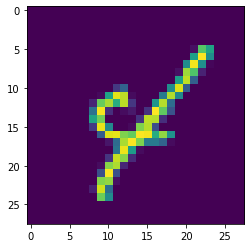

In [20]:

plt.imshow(train[830].reshape(28,28))


In [18]:
train[830].reshape(28,28).shape
train_labels[830]

'4'

## MNIST - linear model

Zastosuj `LogisticRegression`:

 - zestaw danych MNIST jest duży dla tej metody i obliczenia mogą trwać długo. 
 - przeskaluj obrazki i wybierz zestaw 

 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(train)
scaled_train = s.transform(train)
scaled_test = s.transform(test)
reduced_train = scaled_train[:1000]
reduced_train_labels = train_labels[:1000]




In [32]:
np.testing.assert_almost_equal( np.mean(scaled_train,axis=0), 0.0,decimal=5)
np.testing.assert_almost_equal( np.std(scaled_train,axis=0)[np.std(scaled_train,axis=0)>0],1.0,decimal=3)
assert reduced_train.shape == (1000,28**2)
assert reduced_train_labels.shape == (1000,)

Trening wykonamy na 1000 pierwszych przykładów:
     
    clf.fit(reduced_scaled_train,reduced_train_labels)
    
 - UWAGA - dla wszystkich przykładów można  zredukować tolerację:  `solver='sag'` i `tol=0.1`
 

In [42]:
clf = LogisticRegression()
clf.fit(reduced_train,reduced_train_labels)
score = clf.score(scaled_test,test_labels)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
score

0.8137

In [43]:
assert score>0.8

Spróbuj wykonać to samo na obrazkach przeskalowanych z zachowaniem proporcji: 

    scaled_test = test/255
    scaled_train = train/255
    
Czy wynik jest lepszy?    

In [54]:
clf.fit(train[:2000]/255,train_labels[:2000])
clf.score(test/255,test_labels)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8807

## PCA

Wykonaj redukcję PCA do np. 54 cech na cechach przeskalowanych z zachowaniem proporcji:

    scaled_test = test/255
    scaled_train = train/255
    

Wykorzystaj metodę `.inverse_transform`  by otrzymać rekontrukcję orginałów w orginalnej przetrzeni ($28^2$). Narysuj orginały i rekonstrukcję.

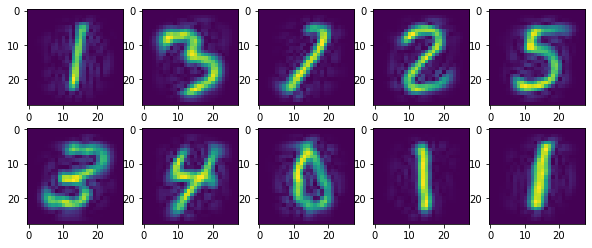

In [9]:
from sklearn.decomposition import PCA

scaled_test = test/255
scaled_train = train/255

def plot10(x,**args):
    f,ax = plt.subplots(2,5,figsize=(10,4))
    for i,c_ in enumerate(x):
        ax.ravel()[i].imshow( np.abs(c_).reshape(28,28),**args ) 
    plt.show()

pca = PCA(n_components=54)
pca.fit(scaled_train)
train_pca = pca.transform(scaled_train)
test_pca = pca.transform(scaled_test)
plot10(pca.inverse_transform(test_pca[:10]))

In [65]:
test_pca.shape
pca.inverse_transform(test_pca[:10]).shape

(10000, 784)

Wykonaj regresję logistyczną dla 54 wymiarowych danych otrzymanych w poprzednim punkcie:

In [70]:
clf = LogisticRegression()
clf.fit(train_pca,train_labels)
score_pca = clf.score(test_pca,test_labels)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [69]:
score

0.899

In [71]:
assert score_pca > 0.85

## Perceptron 

In [ ]:
from sklearn.linear_model import Perceptron

# YOUR CODE HERE
raise NotImplementedError()
score_perceptron

In [ ]:
assert score_perceptron > 0.85

## MNIST z klasyfikatorem kNN

Korzystając z pakietu `sklearn` poklasyfikuj dane MNIST.

*UWAGA* -  testowanie klasyfikatora wymaga kilku sekund na 100 przykładów. Dlatego funkcje: `clf.score` i `clf.predict` należy wywoływać na podziorze danych testujących lub liczyć się z długim czasem działania. 

In [10]:
k = KNeighborsClassifier(n_neighbors=10)
k.fit(train_pca,train_labels)
score_knn = k.score(test_pca[:100],test_labels[:100])


In [11]:
score_knn

0.98

In [12]:
k = KNeighborsClassifier(n_neighbors=10)
k.fit(scaled_train,train_labels)
score_knn = k.score(scaled_test[:100],test_labels[:100])


In [13]:
score_knn

0.96

In [ ]:
assert score_knn>0.9

### Analiza błędów 

Znajdź przykłady (np. 10 sztuk) dla których klasyfikator się pomylił. Zastanów się czy człowiek też mógłby się pomylić w tych przypadkach.

In [ ]:
test_labels[123]

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


##  MNIST z klasyfikatorem SVM

Poklasyfikuj dane MNIST klasyfikatorem SVM, korzystając z implementacji `sklearn` 

 - należy zastosować skalowanie danych (np. `preprocessing.StandardScaler`)
 - warto zacząć eksperymenty od `1000` przykładów trenujących. Trenowanie SVM jest wolne.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


##  MNIST z klasyfikatorem SVM w zredukowanej przestrzeni danych (PCA)

Wykonaj redukcję danych z pomocą PCA, np.:

    pca = decomposition.PCA(n_components=35, whiten=True,\
                            svd_solver='randomized')
                            
                            
                            
 - Zmniejszając wymiar przestrzeni można pokusić się o zwiększenie zbioru trenującego.
 - Przeczytaj co oznacza `whiten`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

print(svm_score)

In [ ]:
assert svm_score > 0.97